Part4- Credit_Card_Fraud_Detection

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.regularizers import l2


In [ ]:

data=pd.read_csv("/content/drive/MyDrive/PIAIC Deep Learning Assignments/creditcard.csv") 
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.Class.duplicated()

0         False
1          True
2          True
3          True
4          True
          ...  
284802     True
284803     True
284804     True
284805     True
284806     True
Name: Class, Length: 284807, dtype: bool

In [ ]:
data1=data.drop(columns='Class')

In [ ]:
Y=data['Class']
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
data1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [ ]:
data1.shape

(284807, 30)

Splitting Data

In [ ]:
print("X_train:",284807*50/100)
print("X_test:",284807*30/100)
print("X_val:",284807*20/100)

X_train: 142403.5
X_test: 85442.1
X_val: 56961.4


In [ ]:
X_train = data1[:142400]
X_test = data1[142400:227840]
X_val = data1[227840:]

In [ ]:
X_train.shape

(142400, 30)

In [ ]:
Y_train = Y[0:142400]
Y_test = Y[142400:227840]
Y_val = Y[227840:]

In [ ]:
Y_train.shape

(142400,)

In [ ]:
# Normalizing train and test data data
mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis=0)
X_train /= std

# Normalizing train and test data data
mean = X_test.mean(axis=0)
X_test-= mean
std = X_test.std(axis=0)
X_test /= std

In [ ]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05,1.424000e+05
mean,-1.658583e-16,8.037368e-16,2.617971e-16,9.965038e-15,-1.304177e-15,2.440757e-15,4.363512e-16,1.626733e-15,-1.973749e-16,2.515992e-15,4.271601e-16,-8.633387e-17,1.395876e-15,-5.780091e-16,1.518611e-15,-3.794918e-16,-2.318058e-17,-4.485356e-16,1.400428e-15,1.780231e-16,6.421660e-16,1.415109e-16,-2.060755e-15,-1.170367e-15,1.988336e-16,-4.893327e-15,2.250026e-16,-5.837052e-18,1.268229e-17,-6.909240e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.483019e+00,-3.095711e+01,-4.516918e+01,-2.713606e+01,-4.277846e+00,-3.207968e+01,-2.045825e+01,-2.715215e+01,-5.940487e+01,-8.433291e+00,-1.734398e+01,-4.061729e+00,-1.746784e+01,-5.785020e+00,-2.096051e+01,-4.734284e+00,-1.545138e+01,-2.849518e+01,-1.131384e+01,-8.900299e+00,-2.928293e+01,-4.824044e+01,-1.704226e+01,-7.590805e+01,-4.780514e+00,-2.384144e+01,-5.190923e+00,-5.805955e+01,-3.825194e+01,-3.679628e-01
25%,-6.734422e-01,-4.254510e-01,-3.606603e-01,-3.967393e-01,-6.467662e-01,-4.757447e-01,-5.771864e-01,-4.174911e-01,-1.584679e-01,-5.723553e-01,-4.494619e-01,-7.234535e-01,-3.940527e-01,-6.561917e-01,-4.053971e-01,-5.795411e-01,-5.317590e-01,-5.128647e-01,-5.586426e-01,-6.042224e-01,-2.946305e-01,-2.579736e-01,-6.762344e-01,-2.349248e-01,-5.659621e-01,-6.100089e-01,-7.082871e-01,-1.564218e-01,-2.104346e-02,-3.436588e-01
50%,8.523202e-02,-1.229156e-02,5.292531e-02,6.077438e-02,2.052584e-02,-2.485956e-02,-1.992586e-01,4.588125e-02,1.306407e-02,-5.898271e-02,-7.356182e-02,-8.277093e-02,1.354990e-01,-1.704894e-03,3.337608e-02,1.199823e-01,8.899542e-02,-7.438868e-02,1.047028e-03,1.814626e-05,-9.603365e-02,-2.740120e-02,3.740109e-02,-2.013664e-02,9.568777e-02,8.368423e-02,-1.787859e-01,2.941671e-02,6.971925e-02,-2.723496e-01
75%,8.400563e-01,7.760739e-01,4.700564e-01,5.449641e-01,6.459546e-01,3.980358e-01,3.001773e-01,4.524074e-01,2.515897e-01,5.286253e-01,4.200385e-01,7.831527e-01,6.118572e-01,6.618960e-01,4.619428e-01,7.216813e-01,6.149646e-01,4.360726e-01,5.671374e-01,6.142110e-01,1.697093e-01,2.119151e-01,6.594266e-01,1.972005e-01,6.664105e-01,6.615787e-01,5.340555e-01,2.239945e-01,2.441314e-01,-4.296320e-02
max,1.529917e+00,1.218167e+00,1.172548e+01,6.878906e+00,1.253690e+01,2.688411e+01,1.750499e+01,3.156966e+01,1.616594e+01,1.438525e+01,2.259043e+01,1.126482e+01,7.672301e+00,4.493557e+00,1.143516e+01,6.003110e+00,6.961513e+00,1.041370e+01,6.158441e+00,6.487166e+00,5.473579e+01,3.777438e+01,1.673629e+01,3.227287e+01,6.733959e+00,1.237246e+01,7.099798e+00,3.126428e+01,1.105301e+02,7.938689e+01


*Build_Model*

In [ ]:
def build_model():
      model = Sequential()
      model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=l2(0.001),input_shape=(X_train.shape[1],)))
      model.add(tf.keras.layers.Dense(8,activation='relu', kernel_regularizer=l2(0.001)))
      model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
      model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
      return model

In [ ]:
build_model()

In [ ]:
model_history = build_model()
model_history = modell.fit(X_train, Y_train, epochs=100, batch_size=500,
                          validation_data=(X_val, Y_val))

In [ ]:
model_history.history.keys()

In [ ]:
epochs=100
all_val_loss=[]
val_loss = model_history.history['val_loss']
all_val_loss.append(val_loss)
average_val_loss = [
np.mean([x[i] for x in all_val_loss]) for i in range(epochs)]

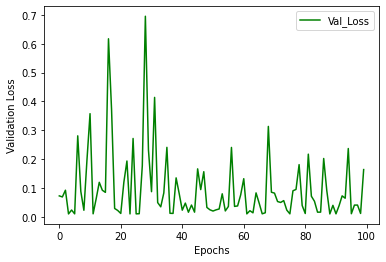

In [ ]:
import matplotlib.pyplot as plt
plt.plot(average_val_loss,'g',label="Val_Loss")
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [ ]:
Accuracy=[]
epochs=100
acc= model_history.history['accuracy']
Accuracy.append(acc)
average_accuracy = [
np.mean([x[i] for x in Accuracy]) for i in range(epochs)]


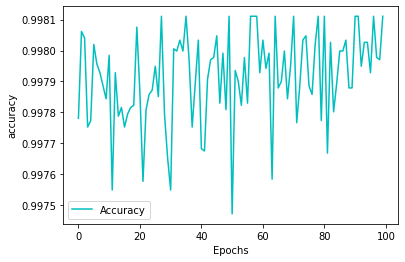

In [ ]:
import matplotlib.pyplot as plt
plt.plot(average_accuracy,'c',label="Accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
#Prediction
Prediction=model.predict(X_test)
Prediction

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
test_loss_score, test_accuracy_score = model.evaluate(X_test, Y_test)
print("test_Loss_score:",test_mse_score,end='\n\n')
print("Accuracy:",test_accuracy_score)

2670/2670 [==============================] - 3s 1ms/step - loss: 704469.3125 - accuracy: 0.9983
test_Loss_score: -251302624.0

Accuracy: 0.9982677698135376
